# Trabalho 3

### Alunos: João Victor Soares Silva - 20210027300
###         Jonas Felipe da Fonseca Oliveira - 20210026948
### Disciplina: Teoria dos Grafos Aplicada

In [1]:
from auxx import *
from graph import *
import random as rd
import matplotlib.pyplot as plt

# Algoritmo de Karger

In [2]:
def karger_alg(G : graph):
    vert = list(range(G.vec_num))
    edges = G.edges_list
    # vertex_dict = {}
    while(len(vert) != 2):
        
        choice = rd.choice(edges)

        new_vert = max(vert)+1 #cria novo vertice
        vert.append(new_vert) #adiciona ao vertices

        # remove os vertices concatenados
        vert.remove(choice[0]) 
        vert.remove(choice[1])
        
        new_edges = [] #Criando uma lista de novas arestas
        # vertex_dict[new_vert] = (choice) #criando um dicionario com a representação dos vertices

        for e in edges: #percorrendo cada vertice antigo
            if sorted(e) == sorted(choice): #não adiciona as arestas concatenadas
                continue

            #muda o valor dos antigos vertices para o novo vertice
            elif choice[0] == e[0] or choice[1] == e[0]:
                new_edges.append((new_vert,e[1]))

            elif choice[0] == e[1] or choice [1] == e[1]:
                new_edges.append((e[0], new_vert))

            #mantem as arrestas de outros vertices
            else:
                new_edges.append(e)
        edges = new_edges
    
    
    return len(edges)

In [3]:
def karger(G : graph, vol : int):
    results_list = []

    for i in range(vol):
        results_list.append(karger_alg(G))
    
    return min(results_list) #retorno minimo

# Algoritmo Ingênuo

In [4]:
def naive_alg (G : graph):
    groups = [1, 2]
    group_1 = []
    group_2 = []
    group_1_size = rd.randint(1, G.vec_num)
    group_2_size = abs(group_1_size - G.vec_num)
    min_cut = 0

    vertices = []
    for i in range (G.vec_num): #gerando a lista dos vértices
        vertices.append(i)

    while (len(vertices) > 0):
        choice = rd.choice(vertices)
        group = rd.choice(groups)

        if group == 1:
            if len(group_1) < group_1_size:
                group_1.append(choice)
            
            else:
                group_2.append(choice)
        
        else:
            if len(group_2) < group_2_size:
                group_2.append(choice)
            
            else:
                group_1.append(choice)
        
        vertices.remove(choice)

    #Pegando o corte mínimo
    for i in group_1:
        for j in group_2:
            if G.are_neigh(i + 1, j + 1):
                min_cut = min_cut + 1
    
    return min_cut

In [5]:
def naive (G : graph, iter_ : int):
    results_list = []

    for i in range (iter_):
        results_list.append(naive_alg(G))

    return min(results_list) #Mínimo

# Probabilidade e Gráfico

In [6]:
def P_Karger_and_Naive (G : graph, exec : int, iter : int, step : int, min_ : int,
                        tol : int, max_iter : int):
    p = 0
    x_iter = []
    y_k_prob = []
    y_n_prob = []

    while (p <= tol):
        p = 0
        count_min_k = 0 #conta os cortes mínimos do algoritmo de karger
        count_min_n = 0 #conta os cortes mínimos do algoritmo ingênuo

        for i in range (exec):
            k = karger (G, iter)
            n = naive (G, iter)
            
            if k == min_:
                count_min_k += 1
            
            if n == min_:
                count_min_n += 1
                
        prob_k = count_min_k / exec
        prob_n = count_min_n / exec

        x_iter.append(iter)
        y_k_prob.append(prob_k)
        y_n_prob.append(prob_n)
        
        iter += step
        if iter >= max_iter:
            break
    
    return x_iter, y_k_prob, y_n_prob

## Testes Empíricos

### Teste 1

In [7]:
G1 = graph.from_a_file("graph_type1_1")

In [18]:
x_1, y_k_1, y_n_1 = P_Karger_and_Naive(G = G1, exec = 100, iter = 5, step = 1,
                                 min_ = 1, tol = 0.99, max_iter = 50)

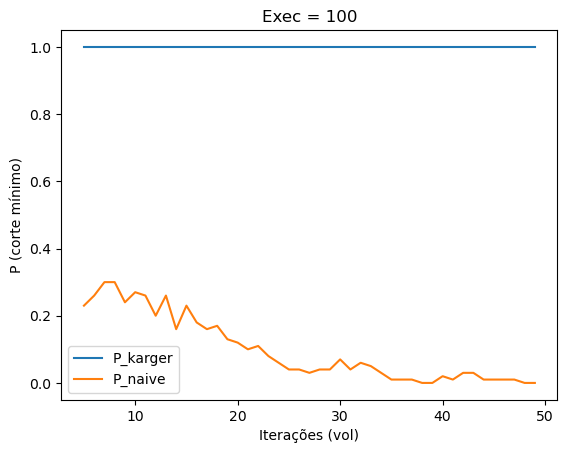

In [19]:
plt.plot()
plt.plot(x_1, y_k_1, label = "P_karger")
plt.plot(x_1, y_n_1, label = "P_naive")
plt.title("Exec = 100")
plt.xlabel("Iterações (vol)")
plt.ylabel("P (corte mínimo)")
plt.legend()
plt.show()

Teste 1:

- O algoritmo de Karger encontra o resultado ótimo constantemente nesse caso;
- O algoritmo ingênuo demonstra sua inconsistência ao diminuir sua probabilidade de encontrar o valor mínimo conforme o número de iterações por execução aumenta.

### Teste 2

In [10]:
G2 = graph.from_a_file("graph_type2_2")

In [11]:
x_2, y_k_2, y_n_2 = P_Karger_and_Naive(G = G2, exec = 500, iter = 5, step = 5,
                                 min_ = 5, tol = 0.98, max_iter = 50)

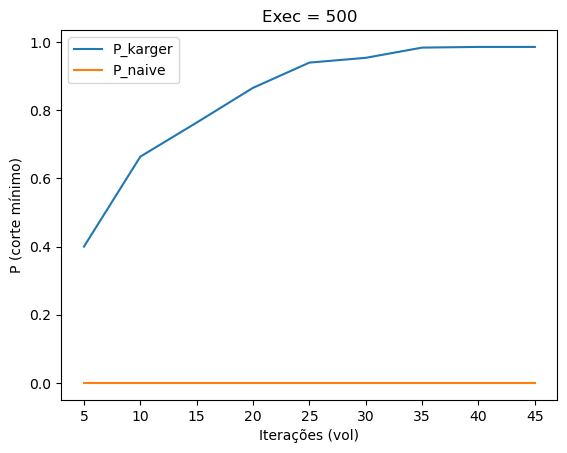

In [20]:
plt.plot()
plt.plot(x_2, y_k_2, label = "P_karger")
plt.plot(x_2, y_n_2, label = "P_naive")
plt.title("Exec = 500")
plt.xlabel("Iterações (vol)")
plt.ylabel("P (corte mínimo)")
plt.legend()
plt.show()

Teste 2:

- O algoritmo de Karger demonstra a curva esperada - com menos suavidade, devido ao aumento do passo do número de iterações - e encontra um resultado ideal quando chega próximo das 35 iterações, mesmo com apenas 500 execuções;
- O algoritmo ingênuo quase nunca consegue encontrar o corte mínimo no caso desse grafo.  

### Teste 3

In [13]:
G3 = graph.from_a_file("graph_type2_3")

In [14]:
x_3, y_k_3, y_n_3 = P_Karger_and_Naive(G = G3, exec = 1000, iter = 5, step = 1,
                                 min_ = 9, tol = 0.98, max_iter = 50)

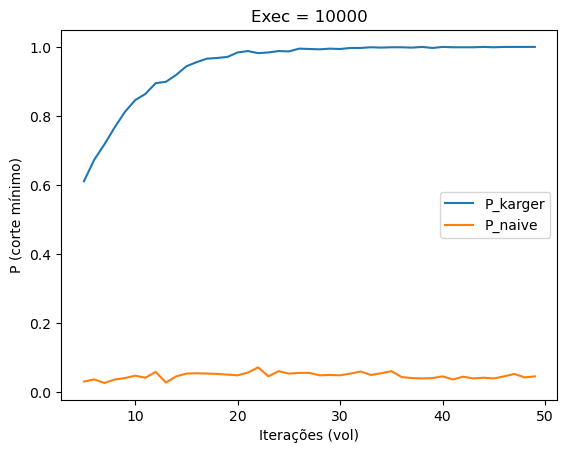

In [15]:
plt.plot()
plt.plot(x_3, y_k_3, label = "P_karger")
plt.plot(x_3, y_n_3, label = "P_naive")
plt.title("Exec = 10000")
plt.xlabel("Iterações (vol)")
plt.ylabel("P (corte mínimo)")
plt.legend()
plt.show()

Teste 3:

- Com o aumento no número de execuções e o acréscimo mínimo no volume, o gráfico chega muito próximo da suavidade esperada. Ainda, é notável como chega-se em um resultado razoável de forma mais rápida com esse aumento no número de execuções, contudo, o algoritmo leva muito mais tempo para ser executado, chegando a levar 20x mais tempo do que o do exemplo anterior - mesmo com, apenas, 5 vértices a mais;
- Novamente, o algoritmo ingênuo se demonstra inconsistente e mesmo com o aumento no número de iterações, ele não apresenta um crescimento estável, apenas alguns picos aleatórios e uma probabilidade muito baixa, em um geral.